## Load necessary modules

In [1]:
import os
import torch as t
import matplotlib.pyplot as plt

# dataset related import
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
# dataloader
from torch.utils.data import DataLoader

# neural network related import
from torch import nn
from torch.nn import functional as F
# optimizer
import torch.optim as toptim
from tqdm import tqdm

## Prepare datasets

### Loading datasets

In [2]:
train_data  = datasets.CIFAR10(
    root        = "data", 
    train       = True, 
    download    = True, 
    transform   = ToTensor()
)
test_data   = datasets.CIFAR10(
    root        ="data", 
    train       =False, 
    download    =True, 
    transform   =ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


### Iterating and visualizing datasets

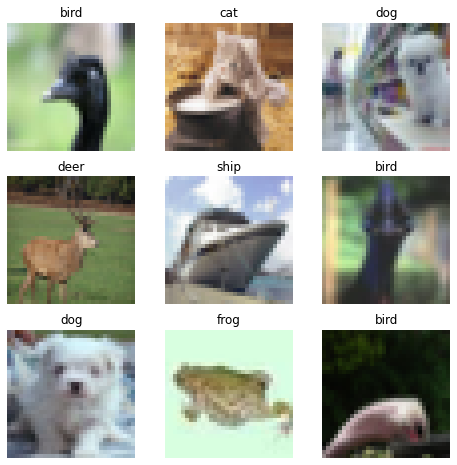

In [3]:
labels_map = {
    0: "airplane", 
    1: "automobile", 
    2: "bird", 
    3: "cat", 
    4: "deer", 
    5: "dog", 
    6: "frog", 
    7: "horse", 
    8: "ship", 
    9: "truck"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = t.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(t.moveaxis(img,0,2)) # moveaxis from (C, H, W) format into (H, W, C) format
plt.show()



## Define the networks, loss function, and optimizer

In [4]:
class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = t.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
# create network
model = MyNetwork()
# define loss function
criterion = nn.MSELoss(reduction="sum")
# define optimizer
optimizer = toptim.SGD(model.parameters(), lr=1e-8, momentum=0.9)

## Training and validation phase

In [6]:
# define batch size for training
batch_size = 32

# create data loader
train_dataloader    = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader     = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [7]:
# for each epoch
for ep in range(1000):
    running_loss = 0.0

    # forward pass for each batch of image start from index 0
    for i, data in tqdm(enumerate(train_dataloader)):
        # get input and label data for traing networks for each batch
        inputs, labels = data

        # zero gradient before computing gradient
        optimizer.zero_grad()

        # do forward propagation
        outputs = model(inputs)
    
        # calculate loss for each batch
        loss = criterion(outputs, labels)

        # do backward propagation
        loss.backward()

        # Update weight using optimizer.step()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (ep + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')
    
    

0it [00:00, ?it/s]D:\anaconda3\envs\vision\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
0it [00:00, ?it/s]


RuntimeError: The size of tensor a (10) must match the size of tensor b (32) at non-singleton dimension 1

### Test forward propagate of network

In [ ]:
# Prepare device for training
device = "cuda" if t.cuda.is_available() else "cpu"
print(f"Using {device} device for training")

model = MyNetwork().to(device)
print(model)

X = t.rand(1, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

## Test phase